In [ ]:
SAM 2 (Segment Anything Model 2)

sam2_capabilities = {
    "тип": "Zero-shot сегментация",
    "архитектура": "ViT-H + prompt encoder",
    "сильные_стороны": [
        "🎯 Сегментация любых объектов без обучения",
        "🚀 Работает по точкам, bbox, маскам",
        "🔍 Высокое качество границ",
        "📊 Поддержка видео"
    ],
    "использование": [
        "Интерактивная сегментация",
        "Создание масок для обучения",
        "Медицинская сегментация",
        "Удаление фона"
    ]
}

In [ ]:
SAM (Segment Anything Model): Эксперт по сегментации "чего угодно". Ему все равно, что сегментировать, ему нужна подсказка (точка, bbox, маска).

In [ ]:
1. SAM (Segment Anything Model)
Разработчик: Meta AI

Философия: Создать универсальную "швейцарскую армию" для сегментации. 
Модель предобучена на гигантском датасете (SA-1B) и может сегментировать любой объект по любой подсказке.

Как работает: Вы даете изображение и подсказку (например, кликаете на объект). 
SAM возвращает высококачественную бинарную маску этого объекта.

Аналогия: Очень опытный художник, который может обвести любой указанный вами предмет идеально по контуру, но не скажет вам, как этот предмет называется.

Использование: Идеален для задач, где важны точные границы объектов, но их семантика (название) либо не важна, либо известна извне.

In [ ]:
Синергия и комбинации моделей
Самое интересное начинается, когда эти модели объединяют!

Классический пайплайн:

Grounding DINO получает изображение и текстовый запрос (например, "колесо машины"). Он находит bounding box для этого объекта.

SAM получает тот же самый кадр и bounding box от Grounding DINO в качестве подсказки.

SAM возвращает пиксельно-точную маску объекта "колесо машины".

Результат: Вы из текстового описания получили не просто грубый прямоугольник, а идеально точную сегментацию нужного объекта. 
Эта связка (Grounding DINO + SAM) стала невероятно популярной и мощной для задач семантической сегментации по тексту.

Итог
SAM — это инструмент для сегментации. Он делает одну вещь, но делает ее блестяще.

DINO — это, в данном контексте, подход к обнаружению объектов, который не relies on ручную разметку.

Grounding DINO — это готовое приложение/модель, которая использует подходы, подобные DINO, для решения практической задачи: детекции по тексту.

In [ ]:
https://github.com/facebookresearch/sam2/tree/main/sam2

https://github.com/facebookresearch/sam2/tree/main/sam2/configs/sam2

https://huggingface.co/facebook/sam2-hiera-large/tree/main

wget https://huggingface.co/facebook/sam2-hiera-large/resolve/main/sam2_hiera_large.pt
wget https://huggingface.co/facebook/sam2-hiera-large/resolve/main/sam2_hiera_l.yaml

https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_tiny.pt





In [ ]:
pip install git+https://github.com/facebookresearch/sam2.git

In [7]:
!pwd

/home/oleg/projects/ML/SAM


In [ ]:
Если автоматическая загрузка не работает, скачайте веса вручную:

bash
    
# Создаем папку для весов
cd projects/ML/SAM/
mkdir -p ~/.cache/sam2
cd ~/.cache/sam2

# Скачиваем веса модели (выберите одну)
wget https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_l.pt -O sam2_hiera_l.pth
# или
wget https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_tiny.pt
wget https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_small.pt
wget https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_base_plus.pt

In [ ]:

# Скачиваем веса модели (выберите одну)
wget https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_l.pt -O sam2_hiera_l.pth

✅ Сегментация завершена за 56.22 секунд


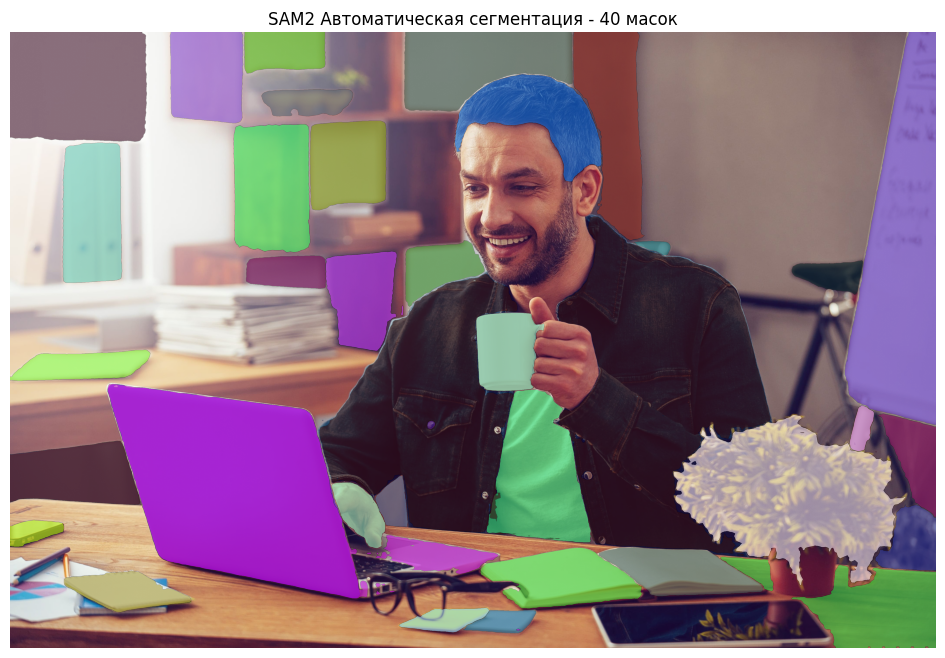

In [10]:
# 🎯 САМЫЙ ПРОСТОЙ РАБОЧИЙ ПРИМЕР SAM2
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sam2.build_sam import build_sam2
from sam2.automatic_mask_generator import SAM2AutomaticMaskGenerator
import time

def simple_sam2_demo(image_path):
    """Простая сегментация"""
    
    # Загрузка модели
    model = build_sam2("sam2_hiera_t.yaml", "sam2_hiera_tiny.pt", device="cpu")
    #model = build_sam2("sam2.1_hiera_t.yaml", "sam2.1_hiera_tiny.pt", device="cpu")
    #model = build_sam2("sam2_hiera_l.yaml", "sam2_hiera_large.pt", device="cpu")
    
    # Создаем генератор масок
    mask_generator = SAM2AutomaticMaskGenerator(model)
    
    # Загрузка изображения
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # ⏱️ ТАЙМЕР ВКЛЮЧЕН
    start_time = time.time()
    
    # Автоматическая сегментация
    masks = mask_generator.generate(image_rgb)

        # ⏱️ ТАЙМЕР ВЫКЛЮЧЕН
    end_time = time.time()
    segmentation_time = end_time - start_time
    
    print(f"✅ Сегментация завершена за {segmentation_time:.2f} секунд")
    
    # Визуализация результата
    plt.figure(figsize=(12, 8))
    plt.imshow(image_rgb)
    
    for mask_data in masks:
        mask = mask_data["segmentation"]
        show_mask(mask, plt.gca(), random_color=True)
    
    plt.axis('off')
    plt.title(f"SAM2 Автоматическая сегментация - {len(masks)} масок")
    plt.show()

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

# Запуск
simple_sam2_demo("/home/oleg/projects/ML/CLIP/images/0d354ad89e92986b19b10a8ac2797dfb.jpg")

CUDA доступно: True
GPU: NVIDIA GeForce RTX 4070
Память GPU: 12.0 GB
Используем устройство: cuda
Запускаем сегментацию на GPU...
✅ Сегментация завершена за 17.62 секунд
Найдено 40 масок


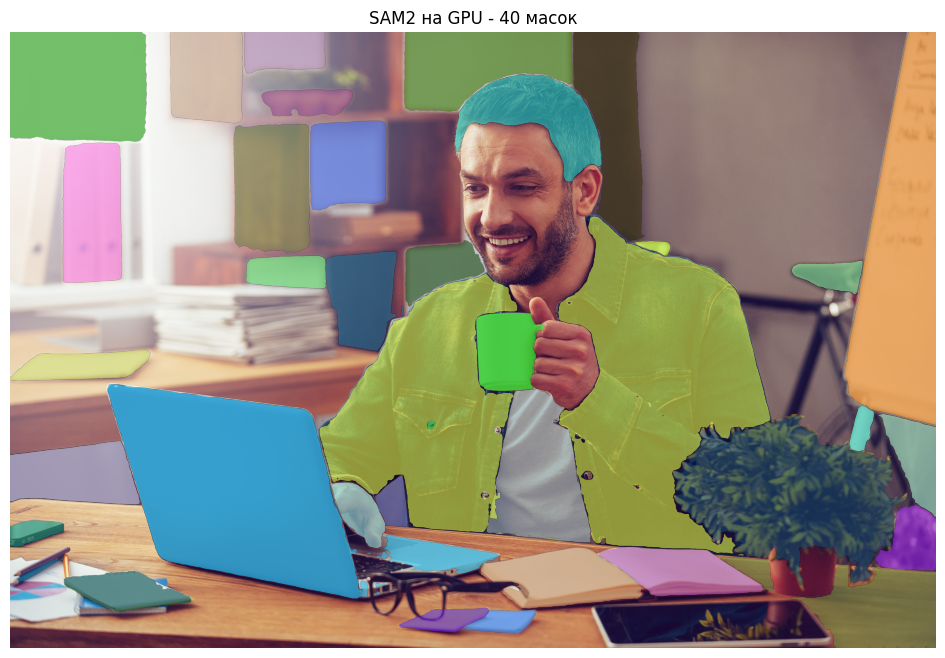

In [12]:
# 🎯 САМЫЙ ПРОСТОЙ РАБОЧИЙ ПРИМЕР SAM2 (с проверкой GPU)
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sam2.build_sam import build_sam2
from sam2.automatic_mask_generator import SAM2AutomaticMaskGenerator
import time

# Проверка доступности GPU
print(f"CUDA доступно: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name()}")
    print(f"Память GPU: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")

def simple_sam2_demo(image_path):
    """Простая сегментация на GPU"""
    
    # Выбираем устройство
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"Используем устройство: {device}")
    
    # Загрузка модели на GPU
    #model = build_sam2("sam2_hiera_l.yaml", "sam2_hiera_large.pt", device=device)
    model = build_sam2("sam2_hiera_t.yaml", "sam2_hiera_tiny.pt", device=device)
    
    # Создаем генератор масок
    mask_generator = SAM2AutomaticMaskGenerator(model)
    
    # Загрузка изображения
    image = cv2.imread(image_path)
    if image is None:
        print(f"Ошибка: не могу загрузить изображение {image_path}")
        return
        
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    print("Запускаем сегментацию на GPU...")
    
        # ⏱️ ТАЙМЕР ВКЛЮЧЕН
    start_time = time.time()
    
    # Автоматическая сегментация
    masks = mask_generator.generate(image_rgb)

        # ⏱️ ТАЙМЕР ВЫКЛЮЧЕН
    end_time = time.time()
    segmentation_time = end_time - start_time
    print(f"✅ Сегментация завершена за {segmentation_time:.2f} секунд")
    
    print(f"Найдено {len(masks)} масок")
    
    # Визуализация результата
    plt.figure(figsize=(12, 8))
    plt.imshow(image_rgb)
    
    for mask_data in masks:
        mask = mask_data["segmentation"]
        show_mask(mask, plt.gca(), random_color=True)
    
    plt.axis('off')
    plt.title(f"SAM2 на GPU - {len(masks)} масок")
    plt.show()

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

# Запуск
simple_sam2_demo("/home/oleg/projects/ML/CLIP/images/0d354ad89e92986b19b10a8ac2797dfb.jpg")

In [ ]:
# 🎯 САМЫЙ ПРОСТОЙ РАБОЧИЙ ПРИМЕР SAM2
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sam2.build_sam import build_sam2
from sam2.automatic_mask_generator import SAM2AutomaticMaskGenerator

def simple_sam2_demo(image_path):
    """Простая сегментация"""
    
    # Загрузка модели
    #model = build_sam2("sam2_hiera_l.yaml", "sam2_hiera_large.pt", device="cpu")
    model = build_sam2("sam2_hiera_l.yaml", "sam2_hiera_large.pt", device="cuda")
    
    # Создаем генератор масок
    mask_generator = SAM2AutomaticMaskGenerator(model)
    
    # Загрузка изображения
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Автоматическая сегментация
    masks = mask_generator.generate(image_rgb)
    
    # Визуализация результата
    plt.figure(figsize=(12, 8))
    plt.imshow(image_rgb)
    
    for mask_data in masks:
        mask = mask_data["segmentation"]
        show_mask(mask, plt.gca(), random_color=True)
    
    plt.axis('off')
    plt.title(f"SAM2 Автоматическая сегментация - {len(masks)} масок")
    plt.show()

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

# Запуск
simple_sam2_demo("/home/oleg/projects/ML/CLIP/images/0d354ad89e92986b19b10a8ac2797dfb.jpg")